In [2]:
#Obtener los valores propios y vectores propios tanto para el ACP como para el AF.

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
imputed_dartaframe = pd.read_csv('../assets/HFCO2_imputed.csv')

In [3]:
imputed_dartaframe

,co2_eq_emissions,downloads,likes,size,size_efficency,auto,training_type_fine-tuning,training_type_pretraining
0,149200.000000,1172830,170,3.528337e+08,2.364837e+03,False,0,1
1,133.021988,14,0,3.081921e+08,2.316851e+06,True,0,0
2,126.344463,14,1,3.083194e+08,2.440308e+06,True,0,0
3,7.989145,45,0,4.380438e+08,5.482988e+07,True,0,0
4,55.101963,43,0,4.333314e+08,7.864173e+06,True,0,0
...,...,...,...,...,...,...,...,...
1414,0.401257,0,0,1.336520e+09,3.330836e+09,True,0,0
1415,0.015786,0,0,3.100225e+08,1.963898e+10,True,0,0
1416,3.673900,0,0,3.100225e+08,8.438513e+07,True,0,0
1417,5.741513,0,0,3.100225e+08,5.399666e+07,True,0,0


In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(imputed_dartaframe), columns=imputed_dartaframe.columns)

In [16]:
# Inicializamos y ajustamos el modelo de ACP
# No especificamos el número de componentes para obtener todos ellos
pca = PCA(n_components=df_scaled.shape[1])
components = pca.fit_transform(df_scaled)

In [39]:
# Obtener los valores propios (varianza explicada por cada componente)
# Estos son equivalentes a los valores propios de la matriz de correlación
eigenvalues_pca = pca.explained_variance_

# Obtener los vectores propios (componentes principales)
eigenvectors_pca = pca.components_

In [21]:
print("Valores Propios (Varianza Explicada) para ACP:")
print(eigenvalues_pca)


Valores Propios (Varianza Explicada) para ACP:
[3.08814906 1.817551   1.21529217 0.98974219 0.7276799  0.15357151
 0.0103276  0.00332834]


In [22]:
cum_var = pd.DataFrame(np.cumsum(pca.explained_variance_ratio_) * 100, columns=['Varianza Acumulada (%)'])
exp_var = pd.DataFrame(pca.explained_variance_ratio_ * 100, columns=['Varianza Explicada (%)'])

pc_names = [f'PC{i+1}' for i in range(len(pca.explained_variance_ratio_))]

final_df = pd.concat([exp_var, cum_var], axis=1)
final_df.index = pc_names

print(final_df)

     Varianza Explicada (%)  Varianza Acumulada (%)
PC1               38.574660               38.574660
PC2               22.703377               61.278036
PC3               15.180447               76.458483
PC4               12.363059               88.821542
PC5                9.089589               97.911130
PC6                1.918291               99.829421
PC7                0.129004               99.958425
PC8                0.041575              100.000000


In [28]:
print("\nMatriz de Vectores Propios (Componentes Principales) para ACP:")
print(components)


Matriz de Vectores Propios (Componentes Principales) para ACP:
[[ 5.13967632e+00 -8.48977241e+00  2.21202564e+01 ... -2.60220162e-02
   1.10959510e-02 -1.33245052e-02]
 [-1.71879340e-01  3.46662701e-01  2.65718613e-02 ...  2.31118577e-02
  -5.70561245e-02  2.31151632e-02]
 [-1.65220198e-01  3.47837942e-01  2.59577434e-02 ...  2.31073071e-02
  -6.45779369e-02  1.69892742e-02]
 ...
 [-1.71943675e-01  3.46951385e-01  2.63538971e-02 ...  2.31102856e-02
  -5.69139085e-02  2.28954656e-02]
 [-1.71930252e-01  3.46864421e-01  2.63539544e-02 ...  2.31126155e-02
  -5.69117997e-02  2.28969440e-02]
 [-1.84041819e-01  4.08383518e-01  2.68174498e-02 ...  2.13805006e-02
  -6.38830511e-02  2.56436551e-02]]


In [34]:
datos_matriz = np.array(components)
df_pca = pd.DataFrame(datos_matriz)

In [40]:
df_eigenvectors = pd.DataFrame(eigenvectors_pca)
df_eigenvectors

,0,1,2,3,4,5,6,7
0,0.557761,0.078031,0.560397,0.555676,-0.015256,-0.135096,0.047788,0.198054
1,0.121250,-0.172204,0.098865,0.122051,0.114249,0.682188,-0.614669,-0.273354
2,-0.091624,0.684353,-0.051658,-0.104339,-0.000453,0.083959,-0.404634,0.582180
3,-0.005949,0.045704,-0.001349,-0.001616,0.992728,-0.074552,0.081452,0.013065
4,0.030655,0.700168,0.081579,0.028359,-0.034404,0.110991,0.237538,-0.656840
5,-0.010318,-0.004875,-0.000398,0.006733,-0.003090,0.700971,0.626853,0.339868
6,-0.129970,0.050727,-0.634050,0.760547,-0.003294,-0.008504,-0.001064,0.000445
7,0.804880,0.031572,-0.514622,-0.293527,0.001387,0.003242,0.012838,-0.000253


In [29]:
import matplotlib.pyplot as plt

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1732/3172467777.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df_pca[0], df_pca[1], df_pca[2],cmap='viridis', s=50)


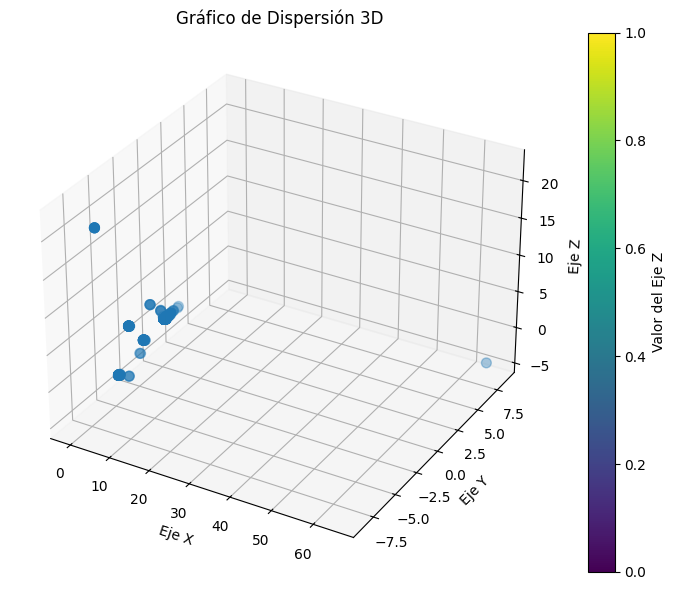

In [35]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_pca[0], df_pca[1], df_pca[2],cmap='viridis', s=50)

# Configurar las etiquetas y el título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_zlabel('Eje Z')
ax.set_title('Gráfico de Dispersión 3D')

# Agregar una barra de color para el eje Z
fig.colorbar(scatter, ax=ax, label='Valor del Eje Z')

# Mostrar el gráfico
plt.show()

/run/user/1000/app/com.jetbrains.PyCharm-Community/ipykernel_1732/935679673.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(df_pca[0], df_pca[1], cmap='viridis', s=50)


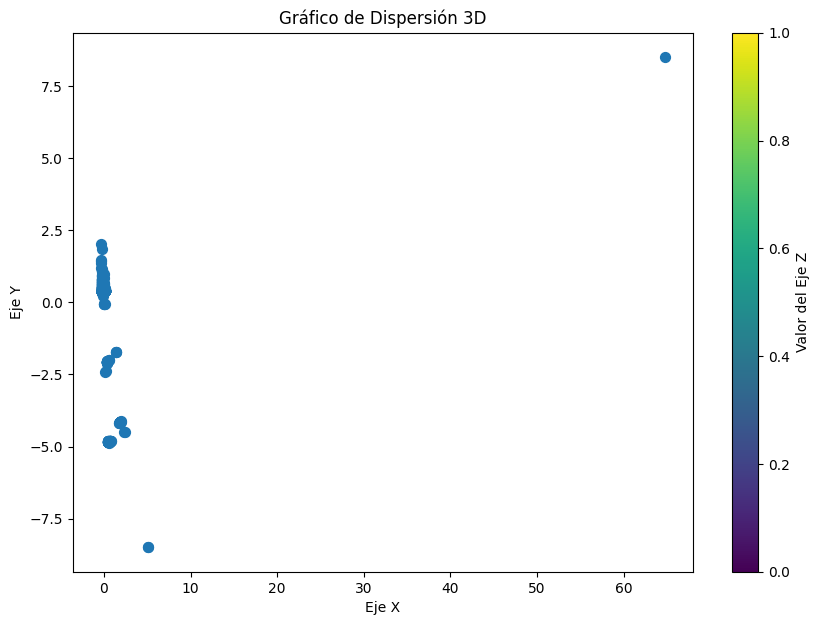

In [38]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)

scatter = ax.scatter(df_pca[0], df_pca[1], cmap='viridis', s=50)

# Configurar las etiquetas y el título
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.set_title('Gráfico de Dispersión 3D')

# Agregar una barra de color para el eje Z
fig.colorbar(scatter, ax=ax, label='Valor del Eje Z')

# Mostrar el gráfico
plt.show()

In [11]:
from sklearn.decomposition import FactorAnalysis

# Usaremos los mismos datos estandarizados que en el ejemplo de ACP.
# (df_scaled de la sección anterior)

# 1. Obtención de los valores propios de la matriz de correlación
# Esto es necesario para la regla de Kaiser, ya que FactorAnalysis no los expone directamente.
corr_matrix = df_scaled.corr()
eigenvalues_fa, eigenvectors_fa = np.linalg.eig(corr_matrix)
eigenvalues_fa.sort()
eigenvalues_fa = eigenvalues_fa[::-1]
print("Valores Propios de la matriz de correlación (para AF):")
print(eigenvalues_fa)


Valores Propios de la matriz de correlación (para AF):
[3.08597277 1.81627013 1.21443573 0.98904469 0.72716708 0.15346328
 0.01032032 0.00332599]


In [12]:
# 2. Decisión del número de factores
# Usando la regla de Kaiser (eigenvalue > 1).
n_factors = sum(eigenvalues_fa > 1)
print(f"\nUsando la regla de Kaiser, el número de factores a extraer es: {n_factors}")


Usando la regla de Kaiser, el número de factores a extraer es: 3


In [13]:
# 3. Ajuste del modelo de Análisis Factorial con el número de factores encontrado
fa = FactorAnalysis(n_components=n_factors, random_state=0)
fa.fit(df_scaled)


,n_components,np.int64(3)
,tol,0.01
,copy,True
,max_iter,1000
,noise_variance_init,None
,svd_method,'randomized'
,iterated_power,3
,rotation,None
,random_state,0


In [14]:
# 4. Obtención de las cargas factoriales
# En el AF, la salida más importante no son los vectores propios, sino las cargas factoriales,
# que te dicen cuánto contribuye cada variable a cada factor latente.
factor_loadings = pd.DataFrame(fa.components_.T, columns=[f'Factor {i+1}' for i in range(n_factors)], index=df_scaled.columns)

print("\nCargas Factoriales (Factor Loadings) del Análisis Factorial:")
print(factor_loadings)


Cargas Factoriales (Factor Loadings) del Análisis Factorial:
                           Factor 1  Factor 2  Factor 3
co2_eq_emissions           0.999853 -0.000640 -0.000572
downloads                  0.036974  0.022646  0.365103
likes                      0.993554  0.017326  0.027340
size                       0.993890  0.004690 -0.013065
size_efficency            -0.007594 -0.062599 -0.044288
auto                      -0.090438 -0.803710 -0.385238
training_type_fine-tuning -0.003634  0.968850 -0.094733
training_type_pretraining  0.201125  0.049280  0.808443


In [15]:
# ¿Qué información se puede extraer de los valores y vectores propios obtenidos?

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

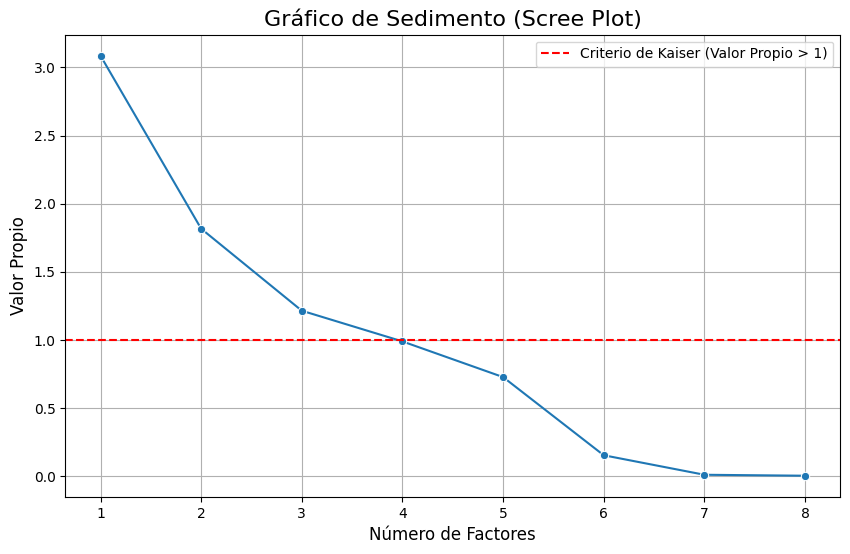

In [20]:
scree_df = pd.DataFrame({
    'Factor': range(1, len(eigenvalues_fa) + 1),
    'Valor Propio': eigenvalues_fa
})

plt.figure(figsize=(10, 6))
sns.lineplot(x='Factor', y='Valor Propio', data=scree_df, marker='o')

# Añadimos una línea de referencia para el criterio de Kaiser (valor propio > 1)
plt.axhline(y=1, color='r', linestyle='--', label='Criterio de Kaiser (Valor Propio > 1)')

plt.title('Gráfico de Sedimento (Scree Plot)', fontsize=16)
plt.xlabel('Número de Factores', fontsize=12)
plt.ylabel('Valor Propio', fontsize=12)
plt.xticks(np.arange(1, len(eigenvalues_fa) + 1))
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# se ecporta los eigenvalores_pca, eigenvectores_pca

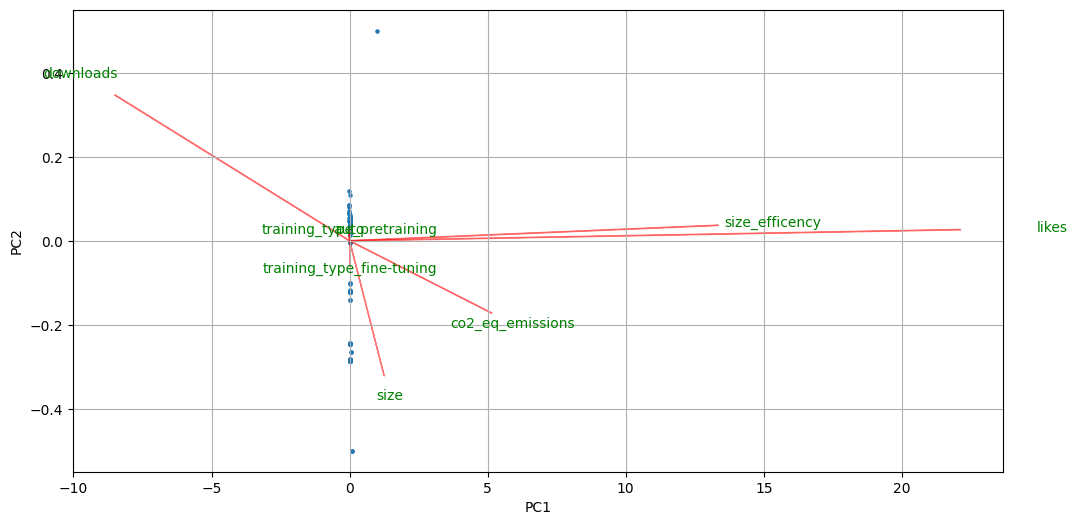

In [43]:
def biplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
plt.figure(figsize=(12, 6))
biplot(components, np.transpose(components), list(imputed_dartaframe.columns))